In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
!pip install pyforest
from pyforest import*

lazy_imports()

['import seaborn as sns',
 'import lightgbm as lgb',
 'import re',
 'import tensorflow as tf',
 'from sklearn.manifold import TSNE',
 'from openpyxl import load_workbook',
 'import pickle',
 'from dask import dataframe as dd',
 'import statistics',
 'from sklearn.ensemble import RandomForestRegressor',
 'import dash',
 'import matplotlib as mpl',
 'import sys',
 'import datetime as dt',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import tqdm',
 'import pandas as pd',
 'import xgboost as xgb',
 'from pathlib import Path',
 'import sklearn',
 'import pydot',
 'import os',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn import svm',
 'import plotly.graph_objs as go',
 'import keras',
 'import numpy as np',
 'import matplotlib.pyplot as plt',
 'import altair as alt',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import spacy',
 'import gensim',
 'from sklearn.ensemble import 

# Read the CSV and Perform Basic Data Cleaning

In [42]:
df = pd.read_csv("breast_cancer.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

<IPython.core.display.Javascript object>

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.columns[1:12]

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [7]:
df = df[df.columns[1:12]]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [8]:
#count of rows and columns
df.shape

(569, 11)

In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
#Get Datatypes of each column in our dataset
df.dtypes

diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [11]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,0]=labelencoder.fit_transform(df.iloc[:,0].values)

In [12]:
#display df
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [13]:
# Check datatypes again
df.dtypes

diagnosis                   int64
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

# EXPLORATORY DATA ANALYSIS

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.00000,0.00000,0.00000,1.00000,1.00000
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400


### Bivariate Data Analysis

<IPython.core.display.Javascript object>

/opt/anaconda3/envs/pythondata/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


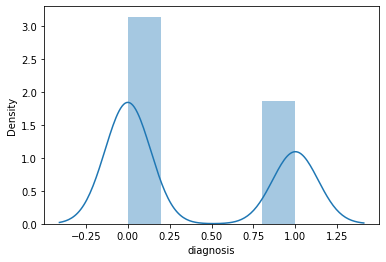

In [15]:
sns.distplot(df['diagnosis']);

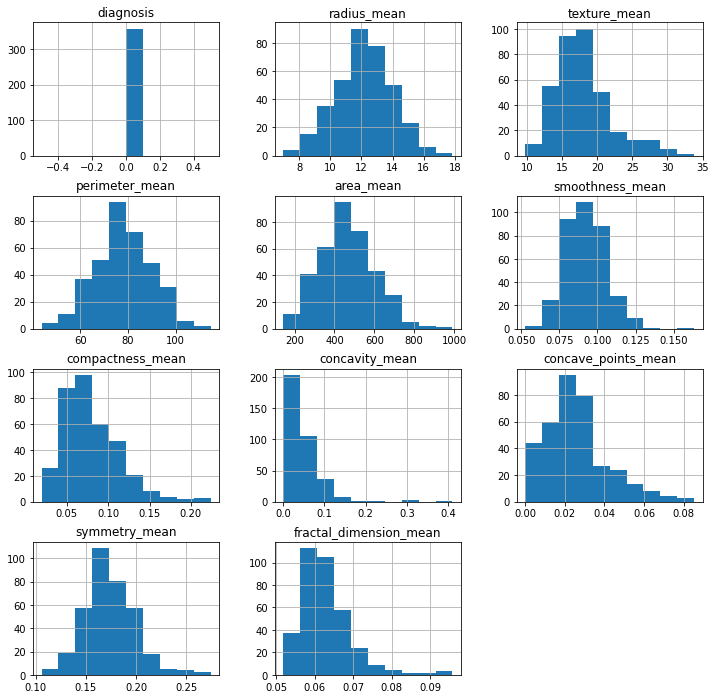

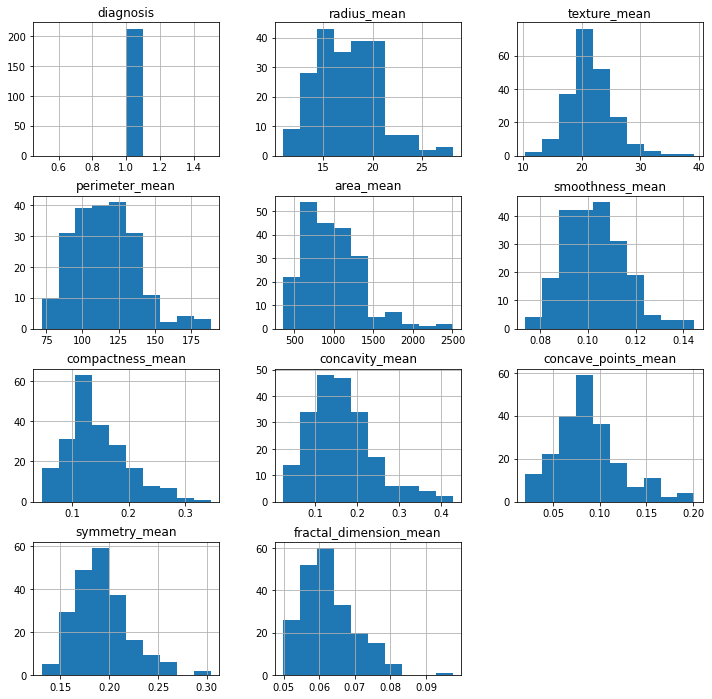

In [16]:
# Visualization of data
df.groupby('diagnosis').hist(figsize=(12, 12));

In [17]:
#Splitting the dataset into independent and dependent datasets 
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

# Create a Train Test Split



In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
X_train

array([[1.289e+01, 1.312e+01, 8.189e+01, ..., 1.171e-02, 1.337e-01,
        5.581e-02],
       [1.340e+01, 2.052e+01, 8.864e+01, ..., 8.172e-02, 2.116e-01,
        7.325e-02],
       [1.296e+01, 1.829e+01, 8.418e+01, ..., 1.883e-02, 1.874e-01,
        5.899e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 6.250e-03, 1.508e-01,
        5.376e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 6.463e-02, 1.669e-01,
        6.544e-02],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 1.770e-02, 1.739e-01,
        5.677e-02]])

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9020979020979021

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [21]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler model and fit it to the training data
X_minmax = MinMaxScaler().fit(X_train)

In [22]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

## Train the Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_minmax, y_train)

In [24]:
print(f"Training Data Score: {rf.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_minmax, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9440559440559441


In [25]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.11504125, 0.0674996 , 0.13217428, 0.13452804, 0.02808247,
       0.04222684, 0.13967657, 0.30190319, 0.01865763, 0.02021013])

In [26]:
feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# We can sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3019031895521523, 'concave_points_mean'),
 (0.13967656959108285, 'concavity_mean'),
 (0.13452803855139356, 'area_mean'),
 (0.13217428190209432, 'perimeter_mean'),
 (0.11504124772082687, 'radius_mean'),
 (0.06749960219943954, 'texture_mean'),
 (0.04222684214394109, 'compactness_mean'),
 (0.028082466653007752, 'smoothness_mean'),
 (0.02021013425097678, 'fractal_dimension_mean'),
 (0.01865762743508499, 'symmetry_mean')]

# HyperParameter Tuning

In [27]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [28]:
X_train_minmax.shape

(426, 10)

In [29]:
# Train the model with GridSearch
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=2

[CV 5/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=

[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV 2/5] END bootstrap=True, max_

[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=True, m

[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 5/5] END bootstrap=True,

[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=Tru

[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=T

[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=

[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'bootstrap': [True], 'max_depth': [70, 80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=3)

In [30]:
print(grid.best_params_)
print(grid.best_score_)

{'bootstrap': True, 'max_depth': 70, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.9366073871409029


In [31]:
# Training score:
grid.score(X_train_minmax, y_train)


0.9788732394366197

In [32]:
# Testing score:
grid.score(X_test_minmax, y_test)

0.951048951048951

In [33]:
# Make prediction and save to variable for report.
predictions = grid.predict(X_test_minmax)

In [34]:
# Print Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        89
           1       0.91      0.96      0.94        54

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



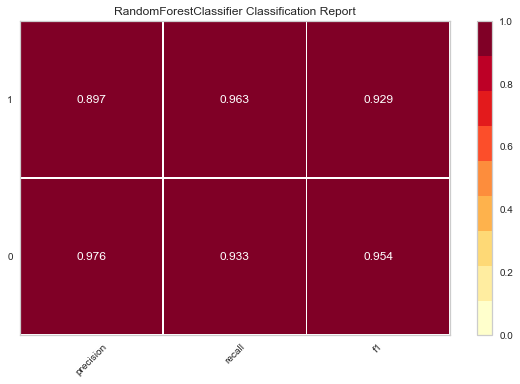

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [35]:
!pip install yellowbrick
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(RandomForestClassifier())
visualizer.fit(X_train_minmax, y_train)
visualizer.score(X_test_minmax, y_test)
visualizer.finalize()
visualizer.show()

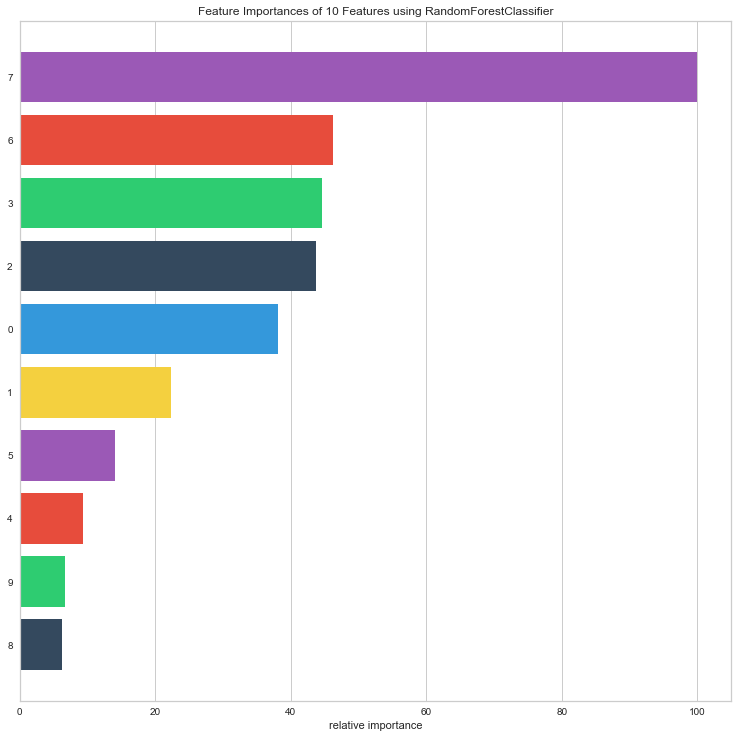

<AxesSubplot:title={'center':'Feature Importances of 10 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [36]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.style import set_palette
from yellowbrick.features import RadViz
set_palette('flatui')
viz = FeatureImportances(rf, size=(750, 750))
viz.fit(X_train_minmax, y_train)
viz.show()

# Save the Model

In [37]:
filename = 'randomforest1.sav'
pickle.dump(rf, open(filename, 'wb'))

<IPython.core.display.Javascript object>

In [38]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_minmax, y_test)

<IPython.core.display.Javascript object>

In [39]:
print(result)

0.9440559440559441
